# Import Dataframes

In [2]:
# import data from "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/" (umsatz_gekuerzt.csv, kiwo.csv, wetter.csv) and save as .csv
import pandas as pd

# import data
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(url + "umsatzdaten_gekuerzt.csv")
df_kiwo = pd.read_csv(url + "kiwo.csv")
df_wetter = pd.read_csv(url + "wetter.csv")

# save data as .csv
df_umsatz.to_csv("df_umsatz.csv", index=False)
df_kiwo.to_csv("df_kiwo.csv", index=False)
df_wetter.to_csv("df_wetter.csv", index=False)

# Dataframes mergen

In [ ]:
import pandas as pd

# Mergen: Umsatzdaten mit Kieler Woche (Left Join)
merged_df = df_umsatz.merge(df_kiwo, on='Datum', how='left')

# Mergen: Das Ergebnis mit Wetterdaten (Left Join)
merged_df = merged_df.merge(df_wetter, on='Datum', how='left')

# Ergebnis anzeigen
print(merged_df.head())

# Anzeigen der Spaltennamen (Variablen) im gemergten DataFrame
print(merged_df.columns)

# save the merged df as df_merged_umsatz_kiwo_wetter
merged_df.to_csv("df_merged_umsatz_kiwo_wetter.csv", index=False)



        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
Index(['Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Bewoelkung',
       'Temperatur', 'Windgeschwindigkeit', 'Wettercode'],
      dtype='object')


# Statistiken zur Kieler Woche

In [4]:
# Filtere die Daten, bei denen 'KielerWoche' == 1
kiwo_only = merged_df[merged_df['KielerWoche'] == 1]

# Entferne Duplikate in der 'Datum'-Spalte, um sicherzustellen, dass jedes Datum nur einmal gezählt wird
unique_kiwo_dates = kiwo_only['Datum'].drop_duplicates()

# Zähle die eindeutigen Tage der Kieler Woche
kiwo_count = unique_kiwo_dates.count()

# Ausgabe
print(f"Die Kieler Woche hat an insgesamt {kiwo_count} verschiedenen Tagen stattgefunden.")

Die Kieler Woche hat an insgesamt 45 verschiedenen Tagen stattgefunden.


Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche:
Warengruppe
1    136.044535
2    538.577783
3    223.323531
4     81.158180
5    315.718687
Name: Umsatz, dtype: float64


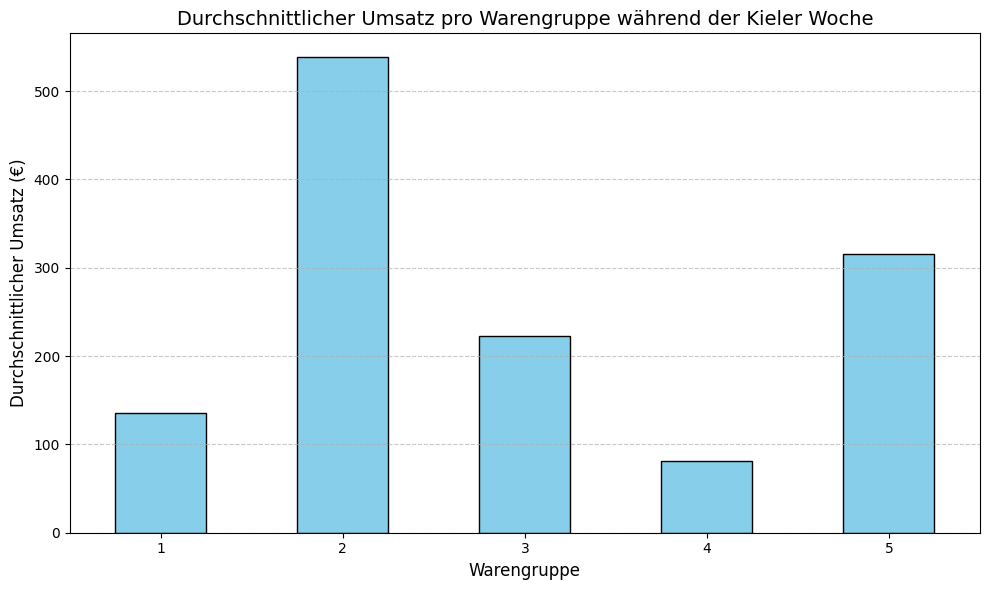

In [6]:
# Filtere die Daten für die Kieler Woche
umsatz_kiwo = merged_df[merged_df['KielerWoche'] == 1]

# Berechne den durchschnittlichen Umsatz pro Warengruppe
durchschnitt_umsatz_pro_warengruppe = umsatz_kiwo.groupby('Warengruppe')['Umsatz'].mean()

print("Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche:")
print(durchschnitt_umsatz_pro_warengruppe)

import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
durchschnitt_umsatz_pro_warengruppe.plot(kind='bar', color='skyblue', edgecolor='black')

# Diagramm anpassen
plt.title('Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche', fontsize=14)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xlabel('Warengruppe', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()
